In [1]:
from sklearn import datasets
iris = datasets.load_iris()
x,y = iris.data, iris.target
print(len(x))
print(len(y))

150
150


In [2]:
from pybrain.datasets.classification import ClassificationDataSet
dataset = ClassificationDataSet(4, 1, nb_classes=3)

#adicionando as amostras

for i in range(len(x)):
    dataset.addSample(x[i], y[i])
len(dataset)

150

In [3]:
dataset['input']

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [4]:
dataset['target']

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
    

In [5]:
len(dataset['target'])

150

In [6]:
# particionando os dados para treinamento
train_data, part_data = dataset.splitWithProportion(0.6)
print('Quantidade para treino: %d' %len(train_data))

#dividindo os dados para teste e validação
test_data, val_data = part_data.splitWithProportion(0.5)
print('Quantidade para teste: %d' %len(test_data))
print('Quantidade para validação: %d' %len(val_data))

Quantidade para treino: 90
Quantidade para teste: 30
Quantidade para validação: 30


In [7]:
from pybrain.tools.shortcuts import buildNetwork
from pybrain.supervised.trainers import BackpropTrainer

net = buildNetwork(dataset.indim, 3, dataset.outdim)
trainer = BackpropTrainer(net, dataset=train_data, learningrate=0.01, momentum = 0.1, verbose=True)
train_erros, val_erros = trainer.trainUntilConvergence(dataset= train_data, maxEpochs=100)

Total error:  0.764747409761
Total error:  0.363922275394
Total error:  0.33246025288
Total error:  0.333077454586
Total error:  0.32701805178
Total error:  0.327255879998
Total error:  0.324788180458
Total error:  0.321096129629
Total error:  0.321796566357
Total error:  0.310557220099
Total error:  0.322489484694
Total error:  0.318813012667
Total error:  0.316738673897
Total error:  0.313345156182
Total error:  0.312583912812
Total error:  0.306803780917
Total error:  0.303511099321
Total error:  0.292058057835
Total error:  0.275975962807
Total error:  0.244715481716
Total error:  0.204673054895
Total error:  0.159386257696
Total error:  0.131137140707
Total error:  0.105410448327
Total error:  0.0884379485958
Total error:  0.075666796165
Total error:  0.0651807608267
Total error:  0.0575601277432
Total error:  0.0545287728641
Total error:  0.049901577884
Total error:  0.0449805765242
Total error:  0.0430574864282
Total error:  0.0407847212901
Total error:  0.0381781740026
Total er

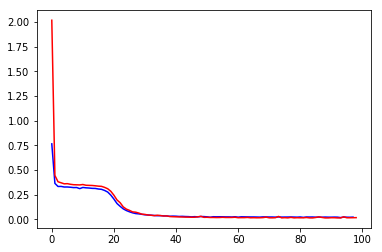

In [9]:
import matplotlib.pyplot as plt
plt.plot(train_erros, 'b', val_erros, 'r')
plt.show()

In [10]:
trainer.trainOnDataset(train_data, 500)

Total error:  0.0202537363062
Total error:  0.0202914098974
Total error:  0.0173648853732
Total error:  0.0182379037552
Total error:  0.0201996349145
Total error:  0.0172159951283
Total error:  0.0200364250554
Total error:  0.0196927171814
Total error:  0.0185974711631
Total error:  0.0192825646224
Total error:  0.0192888353051
Total error:  0.0192948902965
Total error:  0.0192223472216
Total error:  0.0197034350771
Total error:  0.0184645293939
Total error:  0.0192660986816
Total error:  0.0192877618551
Total error:  0.0196279377386
Total error:  0.0187488291927
Total error:  0.0192493451198
Total error:  0.0193997112552
Total error:  0.0179918103149
Total error:  0.0184311628567
Total error:  0.0183853505537
Total error:  0.0188626769472
Total error:  0.0189081855975
Total error:  0.0180042555976
Total error:  0.0183393097866
Total error:  0.0190057946883
Total error:  0.0187912064309
Total error:  0.0179479662323
Total error:  0.0184558926102
Total error:  0.0193561355269
Total erro

Total error:  0.0180654669654
Total error:  0.0183345153423
Total error:  0.0174508807243
Total error:  0.0168468708256
Total error:  0.0172977432466
Total error:  0.0174206862726
Total error:  0.0177253625734
Total error:  0.0166601004135
Total error:  0.0168996653027
Total error:  0.0174316440205
Total error:  0.0171668206901
Total error:  0.0184651259671
Total error:  0.0170284281753
Total error:  0.0185908018191
Total error:  0.0180317663949
Total error:  0.0178788918665
Total error:  0.017425582583
Total error:  0.0166964470392
Total error:  0.0170522475261
Total error:  0.0180246832884
Total error:  0.0176038192457
Total error:  0.0171335933002
Total error:  0.0167073454794
Total error:  0.0180721381548
Total error:  0.0167178895838
Total error:  0.017971307273
Total error:  0.016475737441
Total error:  0.0177575508604
Total error:  0.0169995136301
Total error:  0.0176668670633
Total error:  0.0174716370386
Total error:  0.0185478287361
Total error:  0.0182489690012
Total error: 

In [12]:
out = net.activateOnDataset(test_data)
for i in range(len(out)):
    print('out:  %f, correct: %f' % (out[i], test_data['target'][i]))

out:  1.375512, correct: 1.000000
out:  1.851606, correct: 1.000000
out:  2.154607, correct: 2.000000
out:  1.784354, correct: 2.000000
out:  1.288880, correct: 1.000000
out:  2.196414, correct: 2.000000
out:  1.421039, correct: 1.000000
out:  0.012186, correct: 0.000000
out:  1.787603, correct: 2.000000
out:  1.902303, correct: 2.000000
out:  0.860226, correct: 1.000000
out:  1.961502, correct: 2.000000
out:  0.868793, correct: 1.000000
out:  0.038066, correct: 0.000000
out:  0.906046, correct: 1.000000
out:  0.016489, correct: 0.000000
out:  1.922818, correct: 2.000000
out:  0.005453, correct: 0.000000
out:  0.025306, correct: 0.000000
out:  2.178567, correct: 2.000000
out:  0.014738, correct: 0.000000
out:  0.043514, correct: 0.000000
out:  1.928832, correct: 2.000000
out:  0.014220, correct: 0.000000
out:  1.110120, correct: 1.000000
out:  2.172460, correct: 2.000000
out:  0.700480, correct: 1.000000
out:  1.176207, correct: 1.000000
out:  2.160035, correct: 2.000000
out:  0.044308